### Project - Concrete Strength Prediction

Objective To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.


In [68]:
#Claire Bilski link to GitHub
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-claireebilski.git

SyntaxError: invalid syntax (<ipython-input-68-159f5d587569>, line 2)

#### 1. Exploratory data quality report reflecting the following
1.Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates(10 Marks)

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

from sklearn import metrics

In [3]:
data = pd.read_csv('concrete.csv')
datadf = pd.DataFrame(data)

In [4]:
#Apply info to check datatype
datadf.info()
datadf.describe() #statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
datadf.shape

(1030, 9)

In [6]:
#Finding the number of missing values in datadf
datadf.isnull().values.any() # No null values

False

In [7]:
#Number of unique in each column
datadf.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [8]:
#Check for Low incidence
for col in datadf.columns:
    print(datadf[col].value_counts())
    print("\n")

425.0    20
362.6    20
251.4    15
446.0    14
310.0    14
         ..
312.9     1
261.9     1
325.6     1
143.8     1
145.4     1
Name: cement, Length: 278, dtype: int64


0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
161.0      1
160.5      1
129.0      1
100.6      1
209.0      1
Name: slag, Length: 185, dtype: int64


0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
119.0      1
134.0      1
95.0       1
130.0      1
129.7      1
Name: ash, Length: 156, dtype: int64


192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
165.0      1
237.0      1
166.7      1
191.3      1
184.4      1
Name: water, Length: 195, dtype: int64


0.0     379
11.6     37
8.0      27
7.0      19
6.0      17
       ... 
2.2       1
11.5      1
6.3       1
10.5      1
9.8       1
Name: superplastic, Length: 111, dtype: int64


932.0     57
852.1     45
944.7     30
968.0     29
1125.0    24
          ..
909.7      1
925.3 

count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64

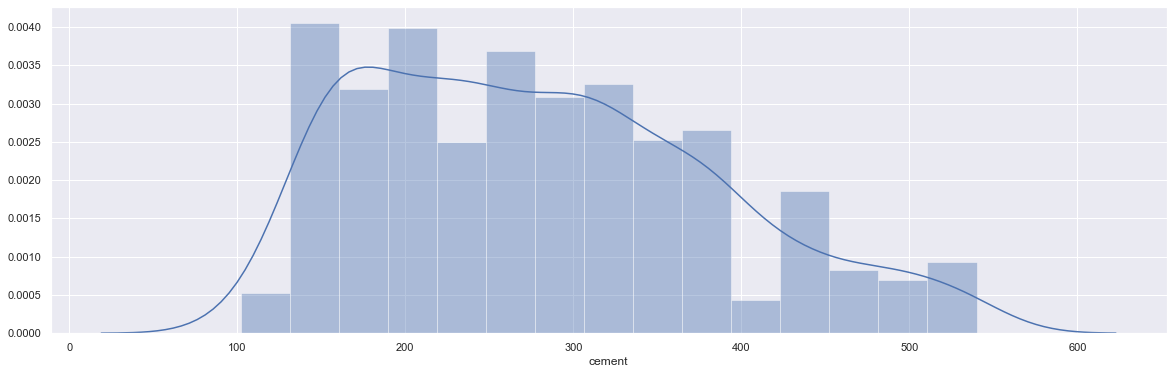

In [9]:
#Distplot for cement (quantitative variable)
df1 = datadf['cement']
plt.figure(figsize=(20,6))
sns.distplot(df1) 
df1.describe()
#Skewed right

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: slag, dtype: float64

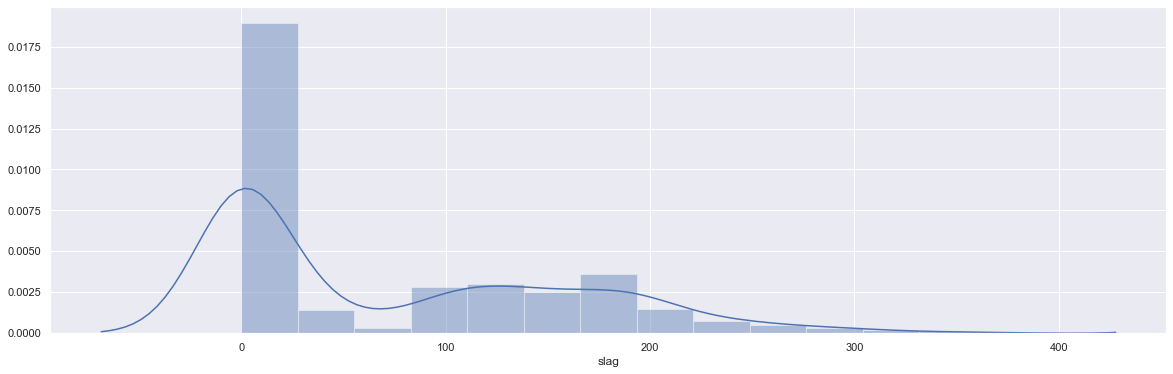

In [10]:
#Distplot for slag (quantitative variable)
df2 = datadf['slag']
plt.figure(figsize=(20,6))
sns.distplot(df2)
df2.describe()
#Skewed right, Bulk of the data around 0.0

count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: ash, dtype: float64

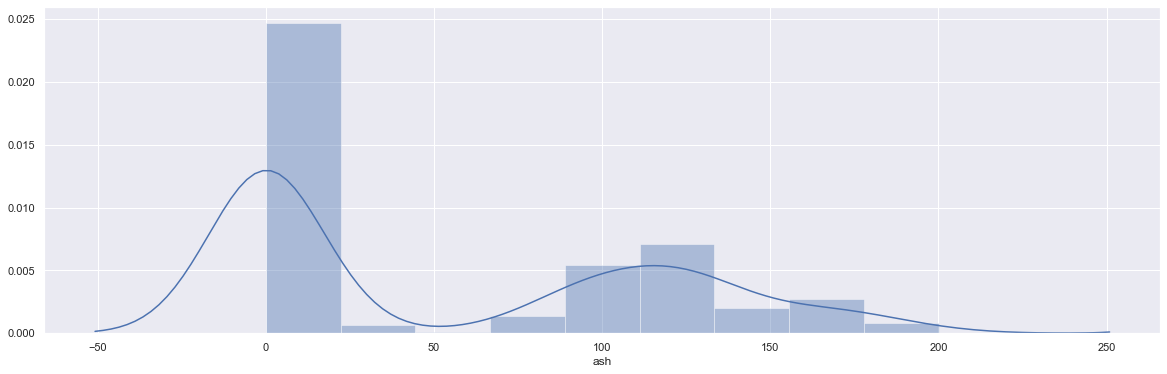

In [11]:
#Distplot for ash status (quantitative variable)
df3 = datadf['ash']
plt.figure(figsize=(20,6))
sns.distplot(df3)
df3.describe()
#Skewed right, Bulk of the data around 0.0

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

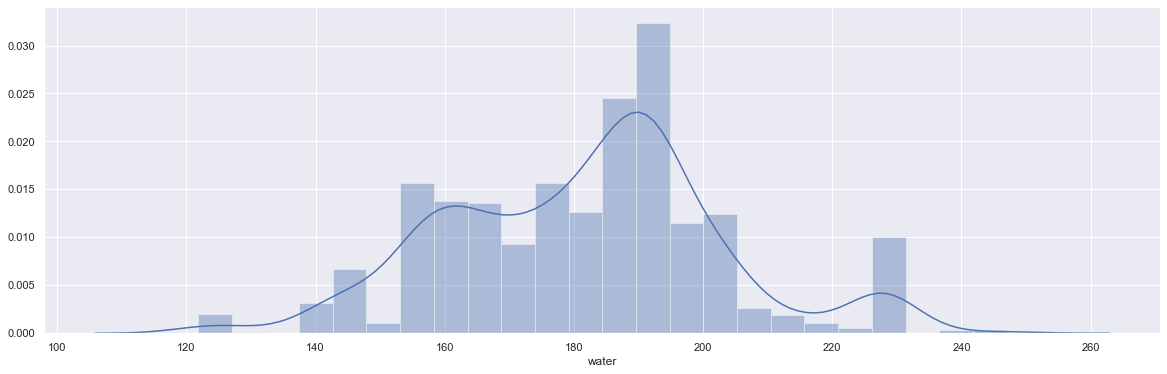

In [12]:
#Distplot for water (quantitative variable)
df4 = datadf['water']
plt.figure(figsize=(20,6))
sns.distplot(df4)
df4.describe()

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplastic, dtype: float64

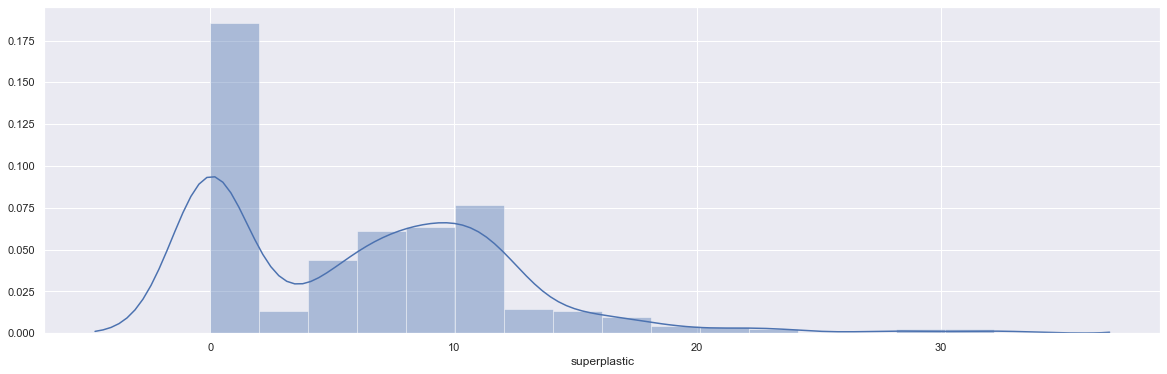

In [13]:
#Distplot for superplastic (quantitative variable)
df5 = datadf['superplastic']
plt.figure(figsize=(20,6))
sns.distplot(df5)
df5.describe()
#Skewed right, Bulk of the data around 0.0
#Noticing a trend between slag, ash, and superplastic

count    1030.000000
mean      972.918932
std        77.753954
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: coarseagg, dtype: float64

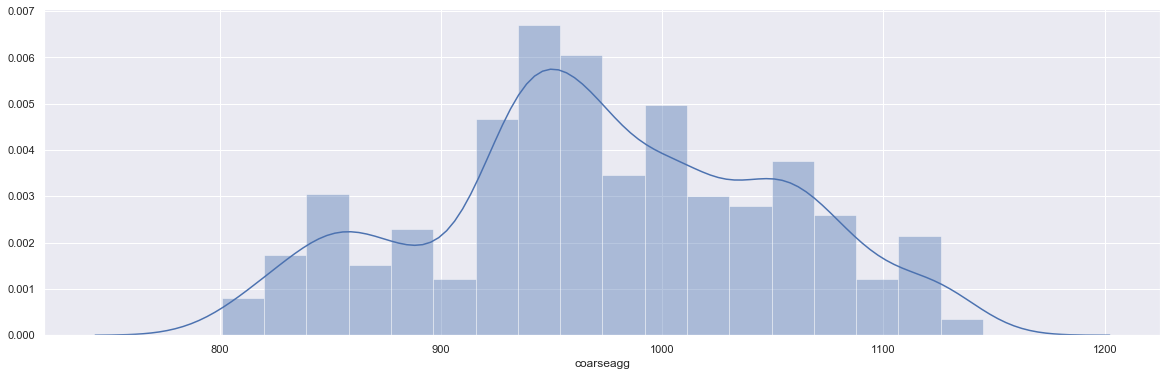

In [14]:
#Distplot for coarseagg (quantitative variable)
df6 = datadf['coarseagg']
plt.figure(figsize=(20,6))
sns.distplot(df6)
df6.describe()

count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineagg, dtype: float64

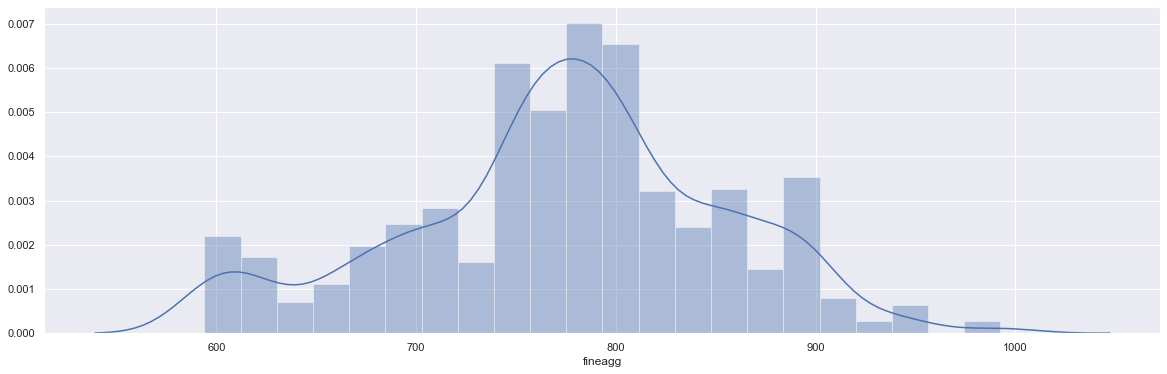

In [15]:
#Distplot for fineagg (quantitative variable)
df7 = datadf['fineagg']
plt.figure(figsize=(20,6))
sns.distplot(df7) 
df7.describe()
#There is a similar trend here between the shape of courseagg and fineagg

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

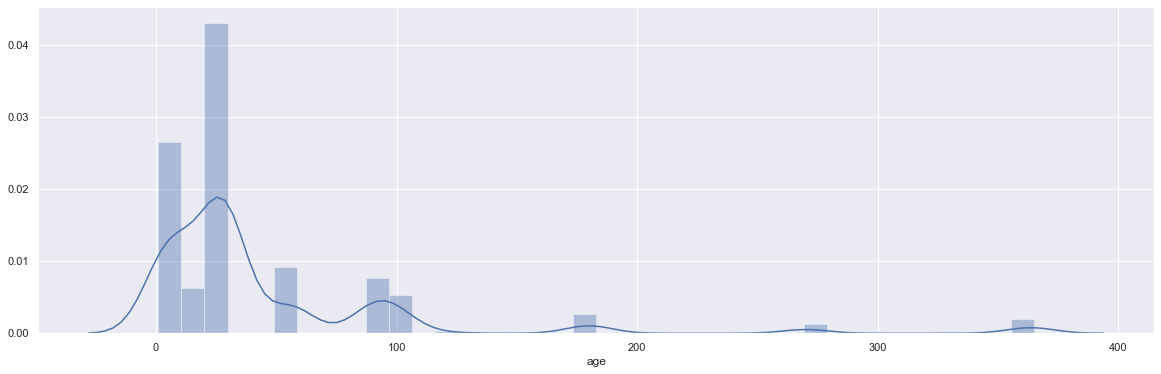

In [16]:
#Displot for age (quantitative variable)
df8 = datadf['age']
plt.figure(figsize=(20,6))
sns.distplot(df8) 
df8.describe()
#The majority of the mixtures are 28 days old.

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

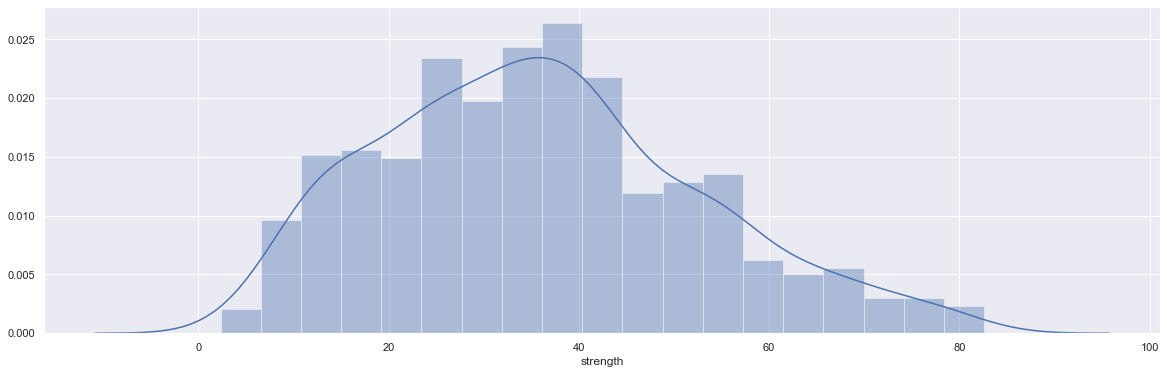

In [17]:
#Distplot for strength (quantitative variable)
df9 = datadf['strength']
plt.figure(figsize=(20,6))
sns.distplot(df9) 
df9.describe()
#From 2.33MPa-82.6MPa

In [18]:
#### 2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)

In [19]:
#Multivariate Exploration
#Drawing relationship between slag, ash, superplastic, and strength
datadf.groupby(['slag','ash','superplastic'])['strength'].value_counts()

slag   ash  superplastic  strength
0.0    0.0  0.0           17.54       3
                          18.13       3
                          25.18       3
                          11.47       2
                          13.52       2
                                     ..
316.1  0.0  0.0           37.81       1
342.1  0.0  0.0           21.92       1
                          39.70       1
359.4  0.0  0.0           25.42       1
                          39.44       1
Name: strength, Length: 980, dtype: int64

In [20]:
#Drawing relationship between fineagg, courseagg, and strength
datadf.groupby(['fineagg','coarseagg'])['strength'].value_counts()

fineagg  coarseagg  strength
594.0    932.0      43.70       2
                    26.26       1
                    30.08       1
                    30.28       1
                    32.82       1
                               ..
992.6    852.1      29.00       1
                    45.70       1
                    56.70       1
                    60.20       1
                    62.50       1
Name: strength, Length: 997, dtype: int64

In [21]:
#Correlation matrix 
datadf.corr()  

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [22]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


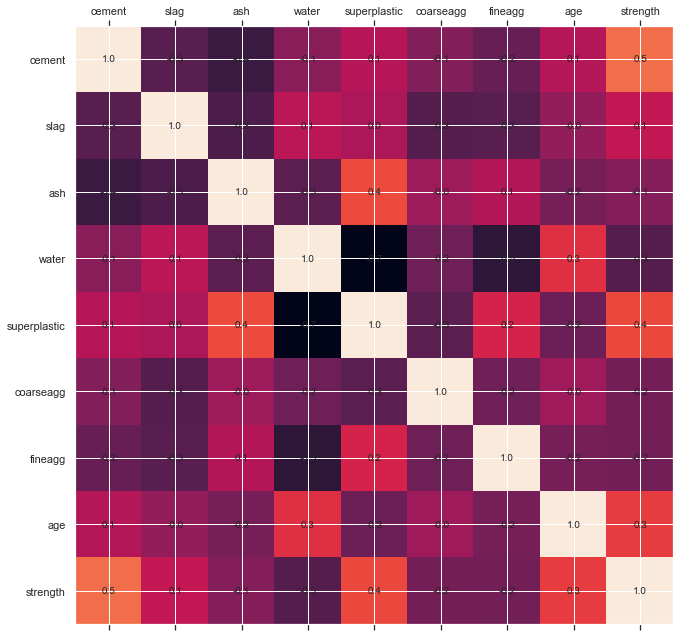

In [23]:
#Mutivariate Analysis
plot_corr(datadf)
#Cement has the highest corr. with strength. 
#Superplastic-ash, superplastic-strength have next highest corr.
#Age-strength, age-water have next highest.

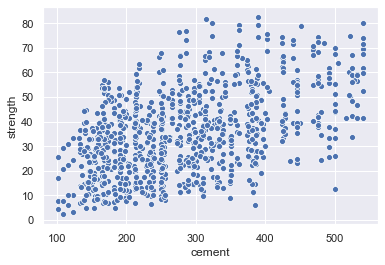

In [24]:
# Mutivariate Analysis Continued
sns.scatterplot(datadf['cement'], datadf['strength'],palette='Set2') 
#Not a very strong correlation.

In [25]:
# Target column which is 'strength' to understand how the data is distributed amongst the various values
datadf.groupby(["strength"]).mean()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
strength,,,,,,,,
2.33,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3.0
3.32,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3.0
4.57,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3.0
4.78,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3.0
4.83,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.0
...,...,...,...,...,...,...,...,...
79.40,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56.0
79.99,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
80.20,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56.0


In [26]:
#### 3.Feature Engineering techniques(10 marks) 
#a.Identify opportunities (if any) to extract a new feature from existing features, drop a feature(if required)
#b.Get data model ready and do a train test split.
#c.Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

In [27]:
#Check for highly correlated variables

In [28]:
#variance_inflation_factor:
 #   8 drivers
 #  driver_1 = function(7 drivers)
 #   X = driver_1
 #   Y = 7 drivers
 #   R^^2 will be high  
 #   vif_driver_1

In [29]:
r_sq = 0.5
vif = 1/(1-r_sq)
vif

2.0

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
print(datadf)

      cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4 

In [32]:
X = datadf

In [33]:
#X = datadf.drop(columns=['water'], inplace=True)

In [34]:
#X.drop(columns=['coarseagg'], inplace=True)

In [35]:
#X.drop(columns=['cement'], inplace=True)

In [36]:
#cols = X.columns.tolist()

In [37]:
#cols.index('cement')

In [38]:
variance_inflation_factor(X.values, 0)

26.232324818614554

In [39]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values(by='vif', ascending=False, inplace=True)

In [40]:
vif.head()
#All under 10 after dropping water, coarseagg, and cement; 6 drivers afterwards

,vif,features
3,92.504056,water
5,85.896630,coarseagg
6,73.514995,fineagg
0,26.232325,cement
8,14.557838,strength


In [41]:
X.shape

(1030, 9)

In [42]:
##Split into training and test set
from sklearn.model_selection import train_test_split

array = datadf.values
X = array[:,0:6]
y = array[:,6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 6), (309, 6), (721,), (309,))

In [43]:
#Checking the split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(datadf.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(datadf.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [44]:
#Build RF Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=2,n_estimators=500,random_state=9999)
rfm=rf.fit(X_train, y_train)

In [45]:
#preds = rf.predict(X_test)[:,1]
y_pred=rf.predict(X_test)

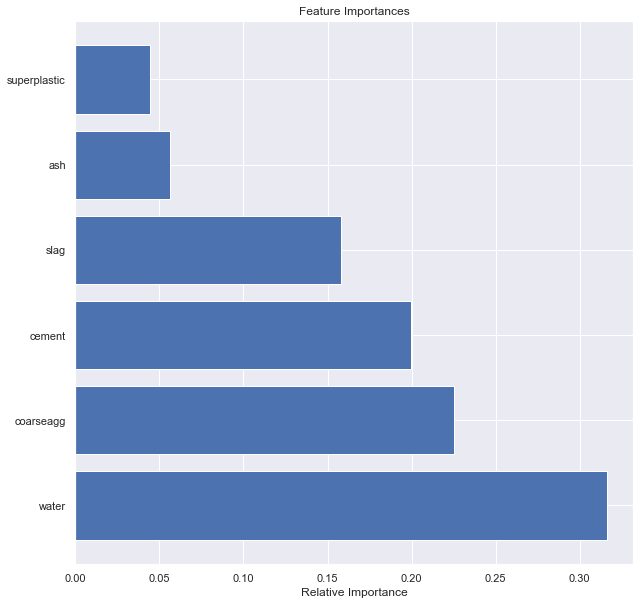

In [46]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = datadf.columns[:]
features= a.drop('strength',1)
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [47]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [48]:
"Train Accuracy:"
(trainResult*100.0)

99.08438756669341

In [49]:
"Test Accuracy:"
(testResult*100.0)

96.84658928642196

In [ ]:
#Model looks good to me with the above parameters. Had to add back the variables that I dropped earlier based on the vif score to achieve a higher train and test accuracy. It should be a quadratic equation. 

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [51]:
num_folds = 10
seed = 77

In [52]:
kfold = KFold(n_splits=num_folds, random_state=seed)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [53]:
results = cross_val_score(rfm,X, y, cv=kfold)
results

array([0.94282974, 0.90982501, 0.9510003 , 0.97226602, 0.95906816,
       0.97189083, 0.95953574, 0.95848717, 0.97193115, 0.94651442])

In [54]:
np.mean(abs(results))

0.9543348526402999

In [55]:
results.std()

0.017865709609938597

In [82]:
#Bagging and Boosting, - not sure how to do these on Regression model
#from sklearn.ensemble import BaggingClassifier

#bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

#bgcl = bgcl.fit(X_train, y_train)

In [83]:
#y_predict = bgcl.predict(X_test)
#print(bgcl.score(X_test , y_test))
#cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
#df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  #columns = [i for i in ["No","Yes"]])
#plt.figure(figsize = (7,5))
#sns.heatmap(df_cm, annot=True ,fmt='g')


In [59]:
#Ridge and Lasso
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [60]:
# All the predictor variables into X dataframe. 
X = datadf.drop('strength', axis=1)

# This is the dependent variable
y = datadf[['strength']]


In [61]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [62]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [63]:
#fit a simple linear model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.7917080306678752
The coefficient for slag is 0.5620608749496462
The coefficient for ash is 0.34747677102632063
The coefficient for water is -0.13186138372514944
The coefficient for superplastic is 0.13449876840644523
The coefficient for coarseagg is 0.11183689241537578
The coefficient for fineagg is 0.17370080312287323
The coefficient for age is 0.4175909779025137


In [64]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.013041400221605257


In [65]:
#Create a regularized RIDGE model and note the coefficients

In [66]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.78652136  0.55696657  0.34291358 -0.13534196  0.13450497  0.10831507
   0.16918324  0.41713594]]


In [67]:
#Create a regularized LASSO model and note the coefficients

In [68]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.39456594  0.14777481  0.         -0.11823668  0.19361099 -0.
 -0.          0.2543608 ]


In [69]:
#Let us compare their scores

In [99]:
score1 = (regression_model.score(X_train, y_train))
print(regression_model.score(X_train, y_train))
score2 = (regression_model.score(X_test, y_test))
print(regression_model.score(X_test, y_test))

0.7549578268848259
0.7444710081439017


In [71]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.603144790939098
0.6340333563625518


In [72]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5215627623725142
0.51856614888699


In [73]:
#Ridge Regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [75]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [76]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 5.02512283e-17  1.34777181e+01  1.01453909e+01  6.05814040e+00
 -1.56595255e+00  4.25130927e+00  1.23634849e+00  2.53761032e+00
  1.49772131e+01  7.59594704e-01  1.15681909e+00 -3.90120685e+00
 -1.73806869e+00  3.29193411e-01  6.17368282e-01  2.91053268e+00
  1.76307429e+00 -1.63204600e+00  5.21667573e-01  3.68167194e-01
  2.08128646e+00  4.26397239e+00 -2.31745785e+00 -2.32994460e+00
  2.58685837e-01  1.97858614e+00  6.75668908e+00  1.96653055e+00
 -1.09589014e+00 -3.09952083e-01 -9.61638886e-01  1.77590106e+00
  9.90577456e-01  2.40653442e+00  1.63052044e+00 -3.01539427e-01
  1.84973490e+00]


In [77]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.         13.3230364   9.98806788  5.92007287 -1.6769773   4.24346992
   1.14709561  2.40295661 14.94433259  0.75048865  1.15780428 -3.8556977
  -1.72087746  0.33506201  0.61718292  2.7638557   1.74523077 -1.60892884
   0.5291864   0.35781419  2.0722416   4.15030544 -2.26730837 -2.32755965
   0.26752031  1.98410524  6.6046349   1.97079137 -1.07823346 -0.3095362
  -1.03929564  1.77010082  0.98752549  2.43497624  1.63032432 -0.31792245
   1.73711233]]


In [78]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.7549463250929687
0.7444379607063953


In [79]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         12.95711163  9.59317708  5.56241425 -1.93810238  4.21165184
  0.92567816  2.09554658 14.88840343  0.69426378  1.08237414 -3.65259792
 -1.71422299  0.28595558  0.59790307  2.25336105  1.63038428 -1.47383575
  0.49781242  0.27234393  2.03103573  3.75939362 -2.07518639 -2.33537427
  0.22372387  1.95973654  6.14359589  1.89575026 -1.02176875 -0.27259848
 -1.27000962  1.73113555  0.8975625   2.55176152  1.59729449 -0.36995176
  1.34962187]


In [80]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7547590604429038
0.7441326585099639


In [83]:
#Grid Search
%matplotlib inline

In [84]:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [85]:
#get data
digits = load_digits()  # Source : http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits
X, y = digits.data, digits.target

In [86]:
#build a classifier
clf = RandomForestClassifier(n_estimators=50)

In [87]:
#specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [88]:
#run randomized search
samples = 10  #number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) #default cv = 3

In [89]:
randomCV.fit(X, y)

print(randomCV.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 7, 'min_samples_split': 9}


In [90]:
#use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [91]:
#run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              ran

In [92]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [93]:
grid_search.cv_results_['mean_test_score']

array([0.79856855, 0.82082482, 0.79020427, 0.81416435, 0.81414268,
       0.80913804, 0.79912102, 0.80358093, 0.82249923, 0.84475859,
       0.83920149, 0.83639121, 0.83697462, 0.82974466, 0.84530795,
       0.83306871, 0.83695915, 0.8497524 , 0.82694831, 0.80971371,
       0.82528629, 0.82471216, 0.82359796, 0.83864284, 0.82305014,
       0.82025843, 0.82527081, 0.92767255, 0.9271139 , 0.922671  ,
       0.91266481, 0.90930981, 0.90206283, 0.86533117, 0.87981894,
       0.87479109, 0.93435159, 0.93491179, 0.92934386, 0.92822501,
       0.93101981, 0.92434076, 0.89706128, 0.90429743, 0.90542247,
       0.92989786, 0.93657227, 0.92601052, 0.92935159, 0.922671  ,
       0.92211544, 0.91098112, 0.90430517, 0.91097338, 0.80691736,
       0.79911947, 0.81582018, 0.81915197, 0.82029093, 0.82026308,
       0.80188641, 0.81748839, 0.80802847, 0.85255029, 0.83361962,
       0.84420149, 0.83470443, 0.84365057, 0.84586196, 0.8386351 ,
       0.83973228, 0.83916435, 0.82082637, 0.82917208, 0.83139

In [94]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 30,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)


score7 = cross_val_score(rf, X, y, cv = 5).mean()


score7

0.9371355617455895

In [ ]:
#dataframe to compare models

In [106]:
data = {'Technique' : ['Regression Train', "Regression Test", 'Ridge Train',
                       'Ridge Test', 'Lasso Train','Lasso Test','RF CV'],
       'Score' : [score1, score2, score3, score4, score5, score6, score7] }

result = pd.DataFrame(data)

In [107]:
result

,Technique,Score
0,Regression Train,0.754958
1,Regression Test,0.744471
2,Ridge Train,0.754946
3,Ridge Test,0.744438
4,Lasso Train,0.754759
5,Lasso Test,0.744133
6,RF CV,0.937136
